# Importing file and reading data 

In [57]:
import pandas as pd
df=pd.read_csv('d://Machine Learning/Regression Analysis-20231127T061222Z-001/Regression Analysis/Melbourne_data/Melbourne_housing_FULL.csv')

In [58]:
col_to_use=["Suburb","Rooms","Type","Method","SellerG",
            "Regionname","Propertycount","Distance","Bedroom2",
            "Bathroom","Car","Landsize","BuildingArea","Price"]
df= df[col_to_use]
df

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,PI,Jas,Western Metropolitan,6543.0,6.3,4.0,1.0,3.0,593.0,NaN,1480000.0
34853,Yarraville,2,h,SP,Sweeney,Western Metropolitan,6543.0,6.3,2.0,2.0,1.0,98.0,104.0,888000.0
34854,Yarraville,2,t,S,Jas,Western Metropolitan,6543.0,6.3,2.0,1.0,2.0,220.0,120.0,705000.0
34855,Yarraville,3,h,SP,hockingstuart,Western Metropolitan,6543.0,6.3,NaN,NaN,NaN,NaN,NaN,1140000.0


In [59]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [60]:
(df.isnull().sum()/df.shape[0])*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Regionname        0.008607
Propertycount     0.008607
Distance          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
Price            21.832057
dtype: float64

In [61]:
df['Propertycount'] = df['Propertycount'].fillna(0)

In [62]:
df['Distance'] = df['Distance'].fillna(0)

In [63]:
df['Bathroom'] = df['Bathroom'].fillna(0)

In [64]:
df['Bedroom2'] = df['Bedroom2'].fillna(0)

In [65]:
df['Car'] = df['Car'].fillna(0)

In [66]:
df["Landsize"]=df["Landsize"].fillna(df.Landsize.mean())

In [67]:
df["BuildingArea"]=df["BuildingArea"].fillna(df.BuildingArea.mean())

In [68]:
#df.dropna(subset = ["Price"],inplace=True)

In [69]:
#df['Regionname'] = df['Regionname'].fillna(0)

In [70]:
df.dropna(inplace = True)

In [71]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [72]:
df.duplicated().sum()

50

# Outlier Handling 

In [73]:
import seaborn as sns

C:\Users\DSP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Bedroom2'>

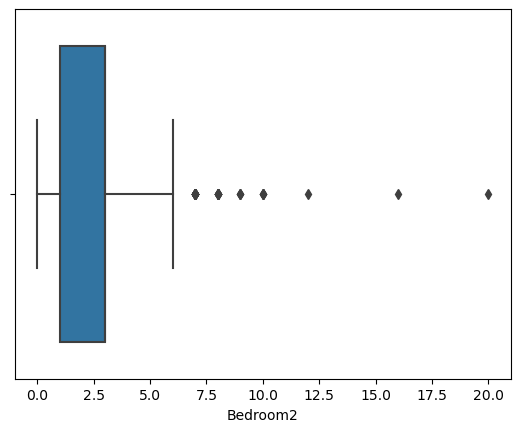

In [74]:
sns.boxplot(x=df["Bedroom2"],orient='h')

In [75]:
for x in df.columns[::]:
    if df[x].dtype==object:
        continue
    else:
        q1=df[x].quantile(q=0.25)
        q3=df[x].quantile(q=0.75)
        IQR= q3-q1
        
        low=q1-1.5*IQR
        high=q3+1.5*IQR
        df.loc[(df[x]<low)| (df[x]>high),x]=df[x].median()

C:\Users\DSP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Bedroom2'>

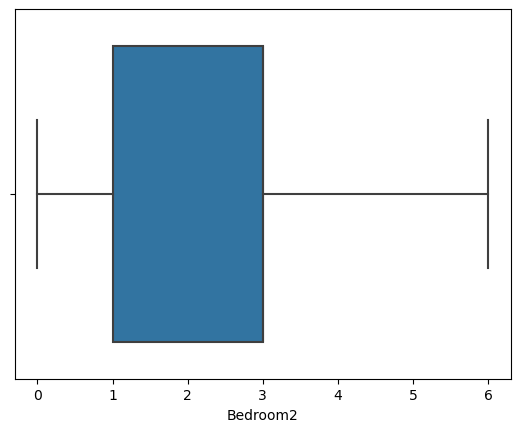

In [76]:
sns.boxplot(x=df["Bedroom2"],orient='h')

# Standardization

In [77]:
# df.corr()

In [78]:
print(df.shape)
df1_num_col = df.drop(['Car',"Suburb","Type",'Method',"SellerG","Regionname","Price"],axis=True)
print(df1_num_col.shape)
df1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,150.0000
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [79]:
df_cat = pd.get_dummies(df,drop_first=True)
print(df_cat.shape)

(27244, 713)


In [80]:
df = pd.concat([df1_num_col,df_cat],axis=1)
df.shape

(27244, 720)

In [81]:
x = df.drop('Price',axis=1)
y = df['Price']
print(x.shape)
print(y.shape)

(27244, 719)
(27244,)


# Performaance Major

In [82]:
# Simple model

In [123]:
x=df['Rooms'].values
y=df['Price']
print(x.shape)
print(y.shape)

(27244, 2)
(27244,)


In [124]:
from sklearn.preprocessing import StandardScaler
# define Min max  Scaler 
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=40)

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model = LinearRegression()

In [128]:
model.fit(x_train,y_train)

LinearRegression()

In [129]:
yp=model.predict(x_train)
ypd=model.predict(x_test)
Reg_predict=model.predict(x_test)

In [130]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [131]:
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)

print("R^2_train X =",x)
print("R^2_test X =",X)
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R^2_train X = 0.17728765102899002
R^2_test X = 0.16458984150460487
MSE =  145683516781.8572


In [132]:
# Finding for y_train and y_test

In [133]:
import numpy as np
x=df['Rooms'].iloc[:,:-1].values
y=df['Price']
print(x.shape)
print(y.shape)

(27244, 1)
(27244,)


In [135]:
from sklearn.preprocessing import StandardScaler
# define Min max  Scaler 
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
model = LinearRegression()

In [139]:
model.fit(x_train,y_train)

LinearRegression()

In [140]:
xp=model.predict(x_train)
xpd=model.predict(x_test)

In [141]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [142]:
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)

print("R^2_train X =",x)
print("R^2_test X =",X)

R^2_train X = 0.17728765102899002
R^2_test X = 0.16458984150460487


In [46]:
# multiple model 

In [72]:
x=df.drop("Price",axis=1)
y=df["Price"]


In [73]:
from sklearn.preprocessing import StandardScaler
# define Min max  Scaler 
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=40)

In [75]:
from sklearn.linear_model import LinearRegression


In [76]:
model = LinearRegression()

In [77]:
model.fit(x_train,y_train)

LinearRegression()

In [78]:
yp=model.predict(x_train)
ypd=model.predict(x_test)
Reg_predict=model.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [80]:
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)
print("R^2_train =",x)
print("R^2_test =",X)
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R^2_train = 0.6144703646521608
R^2_test = -1009433.1180358783
MSE =  1.7603079251503942e+17


In [143]:
# multiple for y_train and y_test

In [157]:
#step 1
x=df.drop("Price",axis=1)
y=df["Price"]

# step 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

# step 3
from sklearn.linear_model import LinearRegression

# step 4 
model = LinearRegression()

# step 5
model.fit(x_train,y_train)

# step 6
xp=model.predict(x_train)
xpd=model.predict(x_test)
Reg_predict=model.predict(x_test)

# step 7
from sklearn.metrics import r2_score
from sklearn import metrics

# step 8
y = r2_score(y_train,xp)
Y= r2_score(y_test,xpd)
print("R^2_train =",y)
print("R^2_test =",Y)
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R^2_train = 0.17728765102899002
R^2_test = 0.16458984150460487
MSE =  145683516781.8572


# Bias and Variance Trade off

#### Bias is traing error and Variance is testing data 

#### when bias is high(far from plotted line ) and high variance is called Underfitting
#### when Bias is low(on the ploted line) and high variance is called overfitting
#### when Bais is low(on the line ) and low variance ( on the line), this is called Generalized Behaviour

In [81]:
## now question is that how to bring the underfitting and overfitting into generalized Behavoiur???

In [82]:
# if function is underfitting than the regression method have to be change

In [83]:
# if overfitting than>>>>>Strategy>>> Ridge & Lasso

# Ridge

In [84]:
# in Generalized behivour the cost function is always zero. And interm of data Overfitting, we must add some error to acheive the best testing answer. so to get achieves the generalized behaiours we must add pelnaty>>>> cost function + penalty = 0 
## penalty >> lamda(slope)

In [85]:
# Ridge regression  = cost Fx + lambda (slope)^2 >>>>>>>>>>>>>>>> simple regression
# Ridge regression  = cost Fx + lambda (Sumation(slope))^2 >>>>>>>>>>>>> multiple regression

In [86]:
# least square line : the actual line 

In [87]:
# more the lambda value lesser will be strip of the slope 

In [88]:
# cross Validation  

# Lasso

In [89]:
# Lasso Regression = cost function + lambda(slope)

In [90]:
# Lasso will give exact zero and Ridge will  be select the features and axact amt 

# Elastic Net

In [91]:
# Elastic Net = cost fx + lambda(slope)^2+lambda|slope|

## Using Lasso (L1 Regularized ) Regression Model 

In [92]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

C:\Users\DSP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.605e+14, tolerance: 3.935e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [94]:
print('x = ',x.shape,'y = ',y.shape)

x =  () y =  (27244,)


In [95]:
yp=lasso_reg.predict(x_train)
ypd=lasso_reg.predict(x_test)

In [96]:
from sklearn.metrics import r2_score

In [97]:
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)
print("R^2_train =",x)
print("R^2_test =",X)

R^2_train = 0.6144441200078696
R^2_test = 0.5908557976634128


In [98]:
# using score

In [99]:
lasso_reg.score(x_test,y_test)

0.5908557976634128

In [100]:
lasso_reg.score(x_train,y_train)

0.6144441200078696

## using Ridge (L2 regularized ) Regression model

In [102]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [103]:
ridge_reg.score(x_test,y_test)

0.5929457574290821

In [104]:
ridge_reg.score(x_train,y_train)

0.6134476423554

# Using Elastifc Net

In [106]:
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(x_train,y_train)

C:\Users\DSP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+15, tolerance: 3.935e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [107]:
En_reg.score(x_test,y_test)

0.33543566250004686

In [108]:
En_reg.score(x_train,y_train)

0.3447115584298911

In [110]:
#Y_pre = model.predict(np.array[20])

# To increase the learning accuracy , the below methods should follow
1. cross Validation
2. Grid Search

# Cross Validation types
1. P-out CV
2. 1-out CV
3. k-fold CV
4. Stratified CV
5. hold-out method

In [148]:
# K-fold Cross validation

# this method gives us with confident on the accuracy of the data
# this method is onli used with contineous data 

In [151]:
a=90+40+70+70+60
a/5

66.0

In [152]:
a=90+85+70+70+60
a/5

75.0

In [153]:
# Stratified cv

# this methods this is onli used for categorical data
# male =8
# female= 2
# 80:20

In [154]:
# 1-out Cross Validation 

# every single data is given  training 

In [155]:
# p-out Cross Validation 

# 

## Grid Search Cross Validation